### Importing Libraries

In [ ]:
!pip install squarify



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from scipy import stats
from plotly.subplots import make_subplots
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import max_error


In [ ]:
df = pd.read_csv('/content/yeast.csv', index_col=0, header=None, delim_whitespace=True)

column_names = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'class']
df.columns = column_names

### Data Visualization and Exploration

In [ ]:
df.head(2)

,col1,col2,col3,col4,col5,col6,col7,col8,class
0,,,,,,,,,
ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT


In [ ]:
df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,class
0,,,,,,,,,
ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


# Class Attribute Information.
  1.  **Sequence Name**: Accession number for the SWISS-PROT database

  2. mcg: McGeoch's method for signal sequence recognition.

  3.  **gvh**: von Heijne's method for signal sequence recognition.

  4.  **alm**: Score of the ALOM membrane spanning region prediction program.

  5. **mit** : Score of discriminant analysis of the amino acid content of
	   the N-terminal region (20 residues long) of mitochondrial and non-mitochondrial proteins.

  6.  **erl**: Presence of "HDEL" substring (thought to act as a signal for
	   retention in the endoplasmic reticulum lumen). Binary attribute.

  7.  **pox**: Peroxisomal targeting signal in the C-terminus.

  8.  **vac**: Score of discriminant analysis of the amino acid content of vacuolar and extracellular proteins.

  9.  nuc: Score of discriminant analysis of nuclear localization signals
	   of nuclear and non-nuclear proteins. *italicized text*

In [ ]:
df_class = df['class'].value_counts()

fig = px.bar(
    df_class,
    text_auto='.2s'   
    
)

fig.update_layout(
    
    title="Target Value Dristribution", 

    xaxis_title="Classes",

    yaxis_title="Count", 
    showlegend= False,
      
)

fig.show()

In [ ]:

fig = px.treemap(names=df_class.index, values=df_class.values, parents=[' '] * df_class.size)

fig.update_layout(
    title="Squrify Plot Yeast Class",
    hovermode=False,
    
  
)

fig.show()

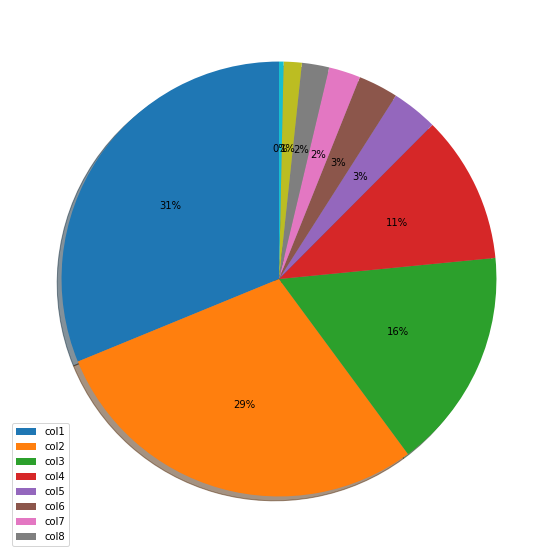

In [ ]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
 
 
# Creating dataset
columns = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8']
 
data = df_class
 
# Creating plot
fig = plt.figure(figsize =(10, 10))
plt.pie(data , autopct='%0.f%%', shadow=True, startangle=90)

plt.legend(columns, loc = 'best')
 
# show plot
plt.show()



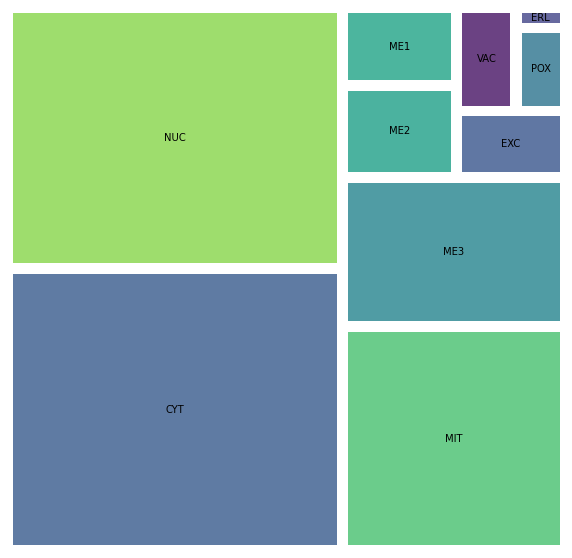

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)

squarify.plot(sizes=df_class.values, label=df_class.index, alpha=.8, pad=True)

plt.axis('off')
plt.show()

In [ ]:
y_data = df.select_dtypes('number').columns

fig = px.box(
    df, y=y_data, 
    points='all'
)

fig.show()

In [ ]:
fig = px.scatter_matrix(
    df,
    dimensions=y_data,
    color="class"
)

fig.update_layout(
    title='PCA . . .',
    dragmode='select',
    height=2000
)

fig.update_traces(diagonal_visible=False)

fig.show()

### Data Pre-processing and cleaning

In [ ]:
# Check nan values
pd.DataFrame(
    df[y_data].isna().sum())

,0
col1,0
col2,0
col3,0
col4,0
col5,0
col6,0
col7,0
col8,0


In [ ]:
transform = stats.boxcox(
    df['col8'].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i)))

In [ ]:
fig = px.histogram(
    transform[0]
)

fig.update_layout(
    title="Feature Distribution ", 
    showlegend=True,
    
)

fig.show()

In [ ]:
fig = make_subplots(
    subplot_titles=y_data,
    rows=4, cols=2
)

for i, feature in enumerate(y_data):
    fig.add_trace(
        go.Histogram(x=df[feature]),
        row=1+(i//2),
         col=1+(i%2)
    )

fig.update_layout(
    title="Feature Distribution",
    height=1200,
    showlegend=False,
    hovermode=False
)

fig.show()

##  One_hot Encoding


..
..

..




In [ ]:
from sklearn.preprocessing import OneHotEncoder
  
#Retrieving data
data = df
# Converting type of columns to category
data['col5']=data['col5'].astype('category')
data['col6']=data['col6'].astype('category')
  
  
#Assigning numerical values and storing it in another columns
data['col5_new']=data['col5'].cat.codes
data['col6_new']=data['col6'].cat.codes 
  
  
#Create an instance of One-hot-encoder
enc=OneHotEncoder()
  
#Passing encoded columns

enc_data=pd.DataFrame(enc.fit_transform(data[['col5_new','col6_new']]).toarray())
  
#Merge with main
New_df=data.join(enc_data)
  
print(New_df)

            col1  col2  col3  col4 col5 col6  col7      col8  class  col5_new  \
6P2K_YEAST  0.45  0.41  0.49  0.14  1.0  0.0  0.53  0.262364      0         1   
6PGD_YEAST  0.74  0.53  0.50  0.08  0.5  0.0  0.55  0.270027      0         0   
AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.198851      7         0   
AATC_YEAST  0.51  0.40  0.56  0.17  0.5  0.5  0.49  0.198851      0         0   
AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.198851      6         0   
...          ...   ...   ...   ...  ...  ...   ...       ...    ...       ...   
YPT7_YEAST  0.61  0.48  0.54  0.25  0.5  0.0  0.50  0.198851      0         0   
YUR1_YEAST  0.81  0.62  0.43  0.17  0.5  0.0  0.53  0.198851      4         0   
ZIP1_YEAST  0.47  0.43  0.61  0.40  0.5  0.0  0.48  0.385262      7         0   
ZNRP_YEAST  0.67  0.57  0.36  0.19  0.5  0.0  0.56  0.198851      4         0   
ZUO1_YEAST  0.43  0.40  0.60  0.16  0.5  0.0  0.53  0.329304      7         0   

            col6_new   0   

In [ ]:
pd.DataFrame(
    New_df[y_data].isna().sum()
    ).T

,col1,col2,col3,col4,col5,col6,col7,col8
0,0,0,0,0,0,0,0,0


In [ ]:
New_df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,class,col5_new,col6_new,0,1,2,3,4
6P2K_YEAST,0.45,0.41,0.49,0.14,1.0,0.0,0.53,0.262364,0,1,0,NaN,NaN,NaN,NaN,NaN
6PGD_YEAST,0.74,0.53,0.50,0.08,0.5,0.0,0.55,0.270027,0,0,0,NaN,NaN,NaN,NaN,NaN
AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.198851,7,0,0,NaN,NaN,NaN,NaN,NaN
AATC_YEAST,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.198851,0,0,1,NaN,NaN,NaN,NaN,NaN
AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.198851,6,0,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['col5','col6'])
print(one_hot_encoded_data)

            col1  col2  col3  col4  col7      col8  class  col5_new  col6_new  \
0                                                                               
ADT1_YEAST  0.58  0.61  0.47  0.13  0.48  0.198851      6         0         0   
ADT2_YEAST  0.43  0.67  0.48  0.27  0.53  0.198851      6         0         0   
ADT3_YEAST  0.64  0.62  0.49  0.15  0.53  0.198851      6         0         0   
AAR2_YEAST  0.58  0.44  0.57  0.13  0.54  0.198851      7         0         0   
AATM_YEAST  0.42  0.44  0.48  0.54  0.48  0.198851      6         0         0   
...          ...   ...   ...   ...   ...       ...    ...       ...       ...   
YUR1_YEAST  0.81  0.62  0.43  0.17  0.53  0.198851      4         0         0   
ZIP1_YEAST  0.47  0.43  0.61  0.40  0.48  0.385262      7         0         0   
ZNRP_YEAST  0.67  0.57  0.36  0.19  0.56  0.198851      4         0         0   
ZUO1_YEAST  0.43  0.40  0.60  0.16  0.53  0.329304      7         0         0   
G6PD_YEAST  0.65  0.54  0.54

In [ ]:

# Calculate logarithm to base 2 
# on 'Salary' column
data['col8'] = np.log1p(data['col8'])
  
# Show the dataframe
data 

df2 = data

df2

,col1,col2,col3,col4,col5,col6,col7,col8,class,col5_new,col6_new
0,,,,,,,,,,,
ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.181363,6,0,0
ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.181363,6,0,0
ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.181363,6,0,0
AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.181363,7,0,0
AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.181363,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...
YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.181363,4,0,0
ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.325890,7,0,0
ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.181363,4,0,0


## **Logistic Regression** *Model*

### CASE - I

80% train

20% test 



In [ ]:
np.random.seed(42)

df2_full = shuffle(df)
                  
X = df2_full.copy().drop('class', axis=1)
y = df2_full['class'].values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [ ]:
Xtrain_full, ytrain_full = Xtrain.copy(), pd.DataFrame(ytrain.copy())

kfold = KFold(n_splits=5, shuffle=True)

scores = []

for train_idx, valid_idx in kfold.split(Xtrain_full):
    Xtrain = Xtrain_full.iloc[train_idx]
    Xvalid = Xtrain_full.iloc[valid_idx]

    ytrain = ytrain_full.iloc[train_idx]
    yvalid = ytrain_full.iloc[valid_idx]

    model = LogisticRegression(max_iter=1000)
    model.fit(Xtrain, ytrain.values.ravel())

    auc_score = model.score(Xvalid, yvalid)
    scores.append(auc_score)

np.array(scores)

array([0.56722689, 0.5       , 0.55696203, 0.48523207, 0.57383966])

In [ ]:
np.mean(scores)

0.5366521292061128

### CASE - II

With split ratio 1:9 for train and test data set which is **10** % train and 90 % test

curcumstances of that are :

* Model variance is high.

* Training model causes underfit

In [ ]:
np.random.seed(42)

df2_full = shuffle(df)
                  
X = df2_full.copy().drop('class', axis=1)
y = df2_full['class'].values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.9)

In [ ]:
Xtrain_full, ytrain_full = Xtrain.copy(), pd.DataFrame(ytrain.copy())

kfold = KFold(n_splits=5, shuffle=True)

scores = []

for train_idx, valid_idx in kfold.split(Xtrain_full):
    Xtrain = Xtrain_full.iloc[train_idx]
    Xvalid = Xtrain_full.iloc[valid_idx]

    ytrain = ytrain_full.iloc[train_idx]
    yvalid = ytrain_full.iloc[valid_idx]

    model = LogisticRegression(max_iter=1000)
    model.fit(Xtrain, ytrain.values.ravel())

    auc_score = model.score(Xvalid, yvalid)
    scores.append(auc_score)

np.array(scores)

array([0.43333333, 0.46666667, 0.5       , 0.34482759, 0.51724138])

In [ ]:
np.mean(scores)

0.4524137931034483

# **Support Vector Machine** *Model*

.


In [ ]:
svc_classifier = SVC(kernel="rbf")
svc_classifier.fit(Xtrain, ytrain.values.ravel())

svc_classifier.score(Xtest, ytest)

0.44610778443113774

## **Decision Tree Classifier** *Model*

.


In [ ]:
tree_classifier = DecisionTreeClassifier(criterion="entropy")
tree_classifier.fit(Xtrain, ytrain)

tree_classifier.score(Xtest, ytest)


0.4356287425149701

.
.

**Accuracy Scores on Test Data :**

* `LogisticRegression_I` - 0.5425415735914619 ( 8:2 )  


* `LogisticRegression_II` -  0.4931034482758621 ( 1:9 )


* `SVM` - 0.5044910179640718


* `Decision tree` - 0.4505988023952096





**Model Analysis :**


* The regression model is 'underfit' as acccuracy score on kfold cross validation is low.

* Pre processing is the part we need to focus so that we can increase the model accuracy .

* The accuracy scores of all the models are pretty same which is near to 50% .
